# Naming Conventions
models/ 
    ../ ('..' is the Task Name. For example : News/ will contain all the models trained for News Classification 
        ../ ( '..' is the Model Name. For examle : SVM/ will contain all Support Vector Machine Models)

    Example :
    Toxic/
        SVM/ (All the SVM's trained)
        RF/ (All the RF's trained)
        NV/ (All the NB's trained) [As of now, I am only using MNB. 

vectors/
    News/
        TF-IDF Vectors
    Toxic/
        TF-IDF Vectors 

# Usage
To use any Vector, Models with the same **ID** number (after the model name) **MUST** be used. Any other, and it will fail.

Ex : vector-1.tfidf will work with model-1.pl
If you try model-2, then it will result in an error

In [18]:
# Visualisation / Plotting
import seaborn as sea
import matplotlib.pyplot as plt

# Feature Extractions / Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Data Structure
import string 
import numpy as np
import pickle
import pandas as pd
from sklearn.externals import joblib

# Model Training for Fake vs Real
*Dataset can be found [here](https://www.kaggle.com/anthonyc1/fake-news-classifier-final-project/data)*

In [19]:
df = pd.read_csv("news_dataset.csv", encoding='utf-8')

In [20]:
df['label'].value_counts()

real    15712
fake    12999
Name: label, dtype: int64

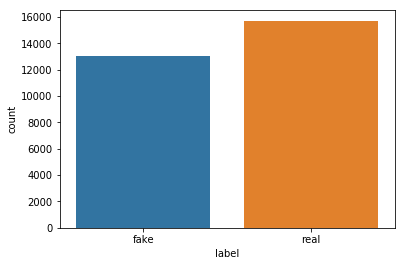

In [21]:
sea.countplot(df['label'])

In [22]:
df.head(5)

,Unnamed: 0,title,content,publication,label
0,0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake


In [23]:
# Dropping null values for now.
df = df.dropna()

In [24]:
# Download NLTK 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Hemin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Hemin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
real, fake = df.loc[df.label == 'real'], df.loc[df.label == 'fake']

### TF-IDF 
```
    Training/Testing on CONTENT only. Title is not used.
    Possible ways of training.
    1. Direct TF-IDF (Baseline and Benchmark)
    2. Word Tokenize and TF-IDF
    3. Word Tokenize, Lemmatize, Remove Punctuation and TF-IDF
```
### Models Used
__*When testing, please test on REAL data as well. High model performance does not mean that the model will work good on Real News samples*__
``` 
    1. Linear SVC (Baseline and Benchmark) 
    2. Multinomial Naive Bayes
    3. Logistic Regression
```

In [30]:
# Get the Real and Fake samples
real_content = list(real.content)
fake_content = list(fake.content)

In [31]:
# Set the Train and Test size (per class)
train_size = 10000
test_size = 1000

In [32]:
# Training Set
x_train = real_content[:train_size] + fake_content[:train_size]
y_train = [1 for _ in range(train_size)] + [0 for _ in range(train_size)]

In [33]:
# Testing Set
x_test = real_content[train_size : train_size + test_size] + fake_content[train_size : train_size + test_size]
y_test = [1 for _ in range(test_size)] + [0 for _ in range(test_size)]

In [34]:
# %%time
# # Tokenize 
# x_train_tokens = [nltk.word_tokenize(sample) for sample in x_train]
# x_test_tokens = [nltk.word_tokenize(sample) for sample in x_test]

In [35]:
# %%time
# # Lemmatize
# lemmatizer = nltk.stem.WordNetLemmatizer()
# x_train_lemmatized = [[lemmatizer.lemmatize(word) for word in tokenized if word not in string.punctuation] for tokenized in x_train_tokens]
# x_test_lemmatized = [[lemmatizer.lemmatize(word) for word in tokenized if word not in string.punctuation] for tokenized in x_test_tokens]

In [36]:
# x_train = x_train_lemmatized[:]
# x_test = x_test_lemmatized[:]

In [37]:
%%time
# TF-IDF Vector implementation.
vectorizer = TfidfVectorizer(ngram_range=(2, 4), stop_words='english')

# Vectorize the training and testing datasets.
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

CPU times: user 2min 52s, sys: 20.1 s, total: 3min 12s
Wall time: 3min 25s


In [38]:
len(vectorizer.vocabulary_)

18463046

In [47]:
def drawConfusionMatrix(true, pred):
    fig, ax = plt.subplots(1,1)
    labels = ["Fake","Real"]
    sea.heatmap(confusion_matrix(y_true, y_pred),annot=True,annot_kws={"size": 12},cmap='Blues', fmt='g', ax=ax, xticklabels=labels, yticklabels=labels)
    plt.show()

# Support Vector Machine

In [48]:
SVM_model = LinearSVC()
SVM_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = SVM_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))

             precision    recall  f1-score   support

       Fake       0.98      0.78      0.87      1000
       Real       0.82      0.99      0.89      1000

avg / total       0.90      0.88      0.88      2000



In [49]:
y_true = y_test
y_pred = SVM_model.predict(x_test_vectorized)
confusion_matrix(y_true, y_pred)

array([[777, 223],
       [ 12, 988]])

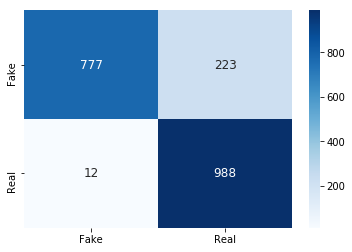

In [50]:
drawConfusionMatrix(y_true,y_pred)

# Naive Bayes

In [51]:
NB_model = MultinomialNB()
NB_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = NB_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))

             precision    recall  f1-score   support

       Fake       0.99      0.77      0.87      1000
       Real       0.81      0.99      0.89      1000

avg / total       0.90      0.88      0.88      2000



In [52]:
y_true = y_test
y_pred = NB_model.predict(x_test_vectorized)
confusion_matrix(y_true, y_pred)

array([[773, 227],
       [ 11, 989]])

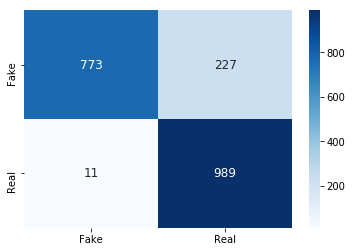

In [53]:
drawConfusionMatrix(y_true,y_pred)

# Logistic Regression

In [55]:
LR_model = LogisticRegression(solver = 'lbfgs')
LR_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = LR_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))


             precision    recall  f1-score   support

       Fake       0.98      0.74      0.84      1000
       Real       0.79      0.98      0.88      1000

avg / total       0.88      0.86      0.86      2000



In [56]:
y_true = y_test
y_pred = LR_model.predict(x_test_vectorized)
confusion_matrix(y_true, y_pred)

array([[739, 261],
       [ 17, 983]])

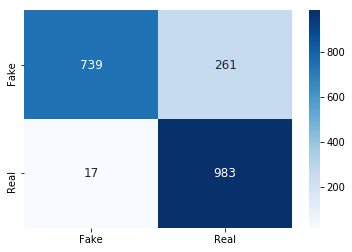

In [57]:
drawConfusionMatrix(y_true,y_pred)

In [24]:
model_id = "3"

# Save Models
pickle.dump(SVM_model, open("models/News/SVM/news_model-" + model_id + ".pl","wb"))
pickle.dump(LR_model, open("models/News/LR/news_model-" + model_id + ".pl","wb"))
pickle.dump(NB_model, open("models/News/NB/news_model-" + model_id + ".pl","wb"))

# Save Vectors
pickle.dump(vectorizer, open('vectors/News/vector-' + model_id + '.pl',"wb"))

## Toxicity Classifier

In [18]:
toxic_df = pd.read_csv("D:/Academic/Data Science/nc_data/toxic/train.csv", encoding='utf-8')

In [19]:
toxic_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
toxic_df.loc[toxic_df['severe_toxic'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['obscene'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['threat'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['insult'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['identity_hate'] == 1,"toxic"] = 1

In [21]:
# Toxic Vectors
toxic = list(toxic_df.loc[toxic_df['toxic'] == 1].comment_text)
nontoxic = list(toxic_df.loc[toxic_df['toxic'] == 0].comment_text)

In [22]:
len(toxic),len(nontoxic)

(15294, 144277)

In [29]:
train_size = 4000
test_size = 2000

In [30]:
# Training Set
x_train = toxic[:train_size] + nontoxic[:train_size]
y_train = [1 for _ in range(train_size)] + [0 for _ in range(train_size)]

In [31]:
# Testing Set
x_test = toxic[train_size : train_size + test_size] + nontoxic[train_size : train_size + test_size]
y_test = [1 for _ in range(test_size)] + [0 for _ in range(test_size)]

In [32]:
# TF - IDF Vector
vectorizer = TfidfVectorizer(ngram_range=(1,3))
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

### Support Vector Machine

In [33]:
SVM_model = LinearSVC()
SVM_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = SVM_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))

              precision    recall  f1-score   support

        Fake       0.86      0.88      0.87      2000
        Real       0.88      0.86      0.87      2000

   micro avg       0.87      0.87      0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



### Naive Bayes

In [34]:
NB_model = MultinomialNB()
NB_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = NB_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))


              precision    recall  f1-score   support

        Fake       0.78      0.94      0.85      2000
        Real       0.92      0.73      0.82      2000

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.85      0.84      0.83      4000
weighted avg       0.85      0.84      0.83      4000



### Logistic Regression

In [35]:
LR_model = LogisticRegression(solver = 'lbfgs')
LR_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = LR_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))


              precision    recall  f1-score   support

        Fake       0.82      0.88      0.85      2000
        Real       0.87      0.81      0.84      2000

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.85      0.84      0.84      4000



In [40]:
pickle.dump(LR_model, open("D:/Academic/Data Science/NewsClassifier/models/Toxic/model-1.toxic","wb"))
pickle.dump(vectorizer, open("D:/Academic/Data Science/NewsClassifier/vectors/Toxic/vector-1.toxic","wb"))

# News Articles


In [62]:
class Article(object) :
    def __init__(self, source, author, title, desc, content, date) :
        self.source = source;
        self.author = author;
        self.title = title;
        self.desc = desc;
        self.content = content;
        self.date = date;

In [63]:
articleObjects = pickle.load(open("D:/Academic/Data Science/NewsClassifier/articles.pl","rb"))

## Get predictions for the articles sent by News API

In [65]:
# x_news = vectorizer.transform([article.content for article in articleObjects if type(article.content) == type("")])
# import json
# fulldb = [c for c in content if type(c) == type("")]
# x_news = vectorizer.transform(fulldb[:10000] + fake_content[11000:])

### Support Vector Machine

In [59]:
# y_pred = SVM_model.predict(x_news)
# y_true = [1 for _ in range(10000)] + [0 for _ in range(len(fake_content[11000:]))]

# print("Accuracy:", classification_report(y_pred = y_pred, y_true = y_true));
# fig, ax = plt.subplots(1,1)
# print("Confusion Matrix");
# sea.heatmap(confusion_matrix(y_pred = y_pred, y_true = y_true),annot=True,annot_kws={"size": 12},cmap='Blues', fmt='g', ax=ax, xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
# plt.show()

### Naive Bayes

In [60]:
# y_pred = NB_model.predict(x_news)
# y_true = [1 for _ in range(10000)] + [0 for _ in range(len(fake_content[11000:]))]

# print("Accuracy:", classification_report(y_pred = y_pred, y_true = y_true));
# fig, ax = plt.subplots(1, 1)
# print("Confusion Matrix");
# sea.heatmap(confusion_matrix(y_pred = y_pred, y_true = y_true),annot=True,annot_kws={"size": 12},cmap='Blues', fmt='g', ax=ax, xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
# plt.show()

### Logistic Regression 

In [61]:
# y_pred = LR_model.predict(x_news)
# y_true = [1 for _ in range(10000)] + [0 for _ in range(len(fake_content[11000:]))]

# print("Accuracy:", classification_report(y_pred = y_pred, y_true = y_true));
# fig, ax = plt.subplots(1, 1)
# print("Confusion Matrix");
# sea.heatmap(confusion_matrix(y_pred = y_pred, y_true = y_true),annot=True,annot_kws={"size": 12},cmap='Blues', fmt='g', ax=ax, xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
# plt.show()